## 随机梯度下降法

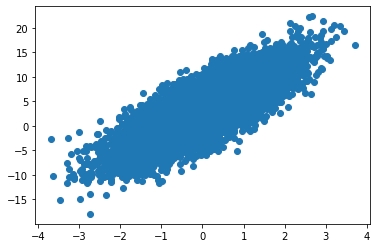

In [6]:
import numpy as np
import matplotlib.pyplot as plt

m = 10000
x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

plt.scatter(x, y)
plt.show()

In [7]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')

def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        cur_iter += 1

    return theta

In [8]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)
theta


CPU times: user 616 ms, sys: 9.51 ms, total: 625 ms
Wall time: 78.8 ms


array([3.02135719, 3.98109206])

In [9]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) * 2

def sgd(X_b, y, initial_theta, n_iters=1e4):
    def learning_rate(t):
        t0 = 5
        t1 = 50
        return t0/(t+t1)

    theta = initial_theta
    for i in range(n_iters):
        idx = np.random.randint(len(X_b))
        X_b_i = X_b[idx]
        y_i = y[idx]
        gradient = dJ_sgd(theta, X_b_i, y_i)
        theta = theta - learning_rate(i) * gradient

    return theta


In [10]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)
theta


CPU times: user 352 ms, sys: 9.19 ms, total: 361 ms
Wall time: 45.1 ms


array([2.90221213, 4.12539283])